## Research Question
*A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to create a solution that would allow her to determine whether ads targeted to audiences of certain characteristics i.e. city, male country, ad topic, etc. would click on her ads. Ceate a prediction model that more accurately predicts whether a user will click an Ad.*

## Metrics of success
*The accuracy score of the model will be used to measure the predictive power of the model.*

In [1]:
# Importing libraries
library(tidyverse)
library(magrittr)
library(corrplot)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract


corrplot 0.84 loaded



In [2]:
# Loading the csv file
df = read_csv('advertising.csv')

# Previewing the first five rows of the dataframe
head(df)

Parsed with column specification:
cols(
  `Daily Time Spent on Site` = col_double(),
  Age = col_double(),
  `Area Income` = col_double(),
  `Daily Internet Usage` = col_double(),
  `Ad Topic Line` = col_character(),
  City = col_character(),
  Male = col_double(),
  Country = col_character(),
  Timestamp = col_datetime(format = ""),
  `Clicked on Ad` = col_double()
)



Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,<dbl>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [3]:
# Checking the class type of the loaded file
class(df)

# Changing loaded file to dataframe
df = as.data.frame(df)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [4]:
# Taking a glimpse on some of the data in the dataframe
glimpse(df)

Observations: 1,000
Variables: 10
$ `Daily Time Spent on Site` <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99...
$ Age                        <dbl> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, ...
$ `Area Income`              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, ...
$ `Daily Internet Usage`     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, ...
$ `Ad Topic Line`            <chr> "Cloned 5thgeneration orchestration", "M...
$ City                       <chr> "Wrightburgh", "West Jodi", "Davidton", ...
$ Male                       <dbl> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0...
$ Country                    <chr> "Tunisia", "Nauru", "San Marino", "Italy...
$ Timestamp                  <dttm> 2016-03-27 00:53:11, 2016-04-04 01:39:0...
$ `Clicked on Ad`            <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0...


In [5]:
# Checking some statistical summaries of the data
summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

In [6]:
# Checking for the dimensions of the dataframe
dim(df)

[1] 1000   10

*The dataset has 1000 observations with a rank of 10*

In [7]:
# Changing column names to lower and replacing spaces with an underscore for readability and easy reference
colnames(df) = tolower(str_replace_all(colnames(df), c(' ' = '_')))

# Checking whether the column names have been renames appriopriately
print(colnames(df))

 [1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked_on_ad"           


*There are ten variables/ features in the dataset*

In [8]:
# The male column should be renamed to gender
colnames(df)[colnames(df) == 'male'] = 'gender'

In [9]:
# Checking the datatypes for each column
columns = colnames(df)
for (column in seq(length(colnames(df)))){
    print(columns[column])
    print(class(df[, column]))
    cat('\n')
}

[1] "daily_time_spent_on_site"
[1] "numeric"

[1] "age"
[1] "numeric"

[1] "area_income"
[1] "numeric"

[1] "daily_internet_usage"
[1] "numeric"

[1] "ad_topic_line"
[1] "character"

[1] "city"
[1] "character"

[1] "gender"
[1] "numeric"

[1] "country"
[1] "character"

[1] "timestamp"
[1] "POSIXct" "POSIXt" 

[1] "clicked_on_ad"
[1] "numeric"



In [10]:
# Changing column names to their appriopriate data type
# Creating a lists of categorical and numerical columns 

# List of categorical columns
cat_cols = c("ad_topic_line", "city", "gender", "country", "clicked_on_ad" )

# List of numerical columns
num_cols = c("daily_time_spent_on_site", "age", "area_income", "daily_internet_usage")

# Changing columns to factors
df[,cat_cols] %<>% lapply(function(x) as.factor(as.character(x)))

In [11]:
# Checking whether the datatypes for each column have been changed apprippriately
columns = colnames(df)
for (column in seq(length(colnames(df)))){
    print(columns[column])
    print(class(df[, column]))
    print(nlevels(df[, column]))
    cat('\n')
}

[1] "daily_time_spent_on_site"
[1] "numeric"
[1] 0

[1] "age"
[1] "numeric"
[1] 0

[1] "area_income"
[1] "numeric"
[1] 0

[1] "daily_internet_usage"
[1] "numeric"
[1] 0

[1] "ad_topic_line"
[1] "factor"
[1] 1000

[1] "city"
[1] "factor"
[1] 969

[1] "gender"
[1] "factor"
[1] 2

[1] "country"
[1] "factor"
[1] 237

[1] "timestamp"
[1] "POSIXct" "POSIXt" 
[1] 0

[1] "clicked_on_ad"
[1] "factor"
[1] 2



*Inferences that can be drawn from the above summary:*
 - *There are 969 unique cities in the dataset.*
 - *There are 237 inique counties in the dataset*
 - *All the values in the ___ad_topic_line___ variable are unique, therefore they wont add new information when modelling*

In [12]:
# Checking for missing values
colSums(is.na(df))

daily_time_spent_on_site                      age              area_income 
                       0                        0                        0 
    daily_internet_usage            ad_topic_line                     city 
                       0                        0                        0 
                  gender                  country                timestamp 
                       0                        0                        0 
           clicked_on_ad 
                       0

*There are no missing values in the dataset*

In [13]:
# Checking for duplicates
anyDuplicated(df)

[1] 0

*There is no duplicated data in the dataset*

In [14]:
# Frequency tables
table(df$gender)


  0   1 
519 481 

*The gender variable is fairly balanced, with females slightly more than the males*

In [15]:
table(df$clicked_on_ad)


  0   1 
500 500 

*The dataset is well balanced with a ratio of ___1:1___*

### Univariate analysis

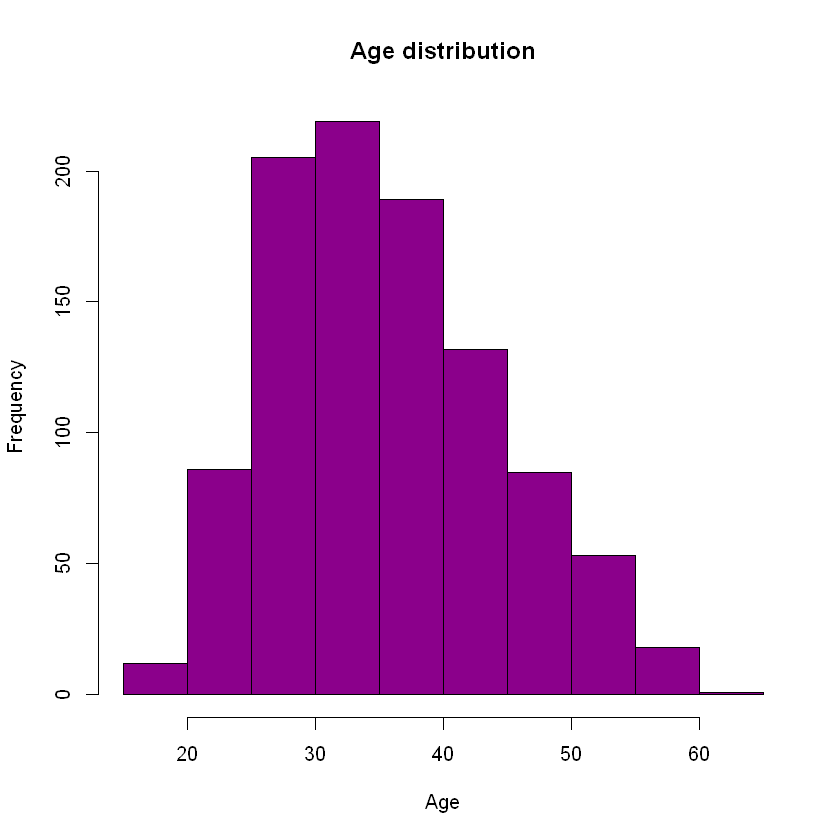

In [27]:
# Plotting a histogram to check for the distribution of the age
hist(df$age, col = 'darkmagenta',
    main = 'Age distribution',
    xlab = 'Age',
    ylab = 'Frequency')

*Inferences drawn from the above plot include;*
 - *The minimum age in the dataset is 5*
 - *The maximum age is 70*
 - *The age distribution is skewed to the right*
 - *Majority of individuals in the dataset are between the ages of 30 and 35*

## Bivariate analysis

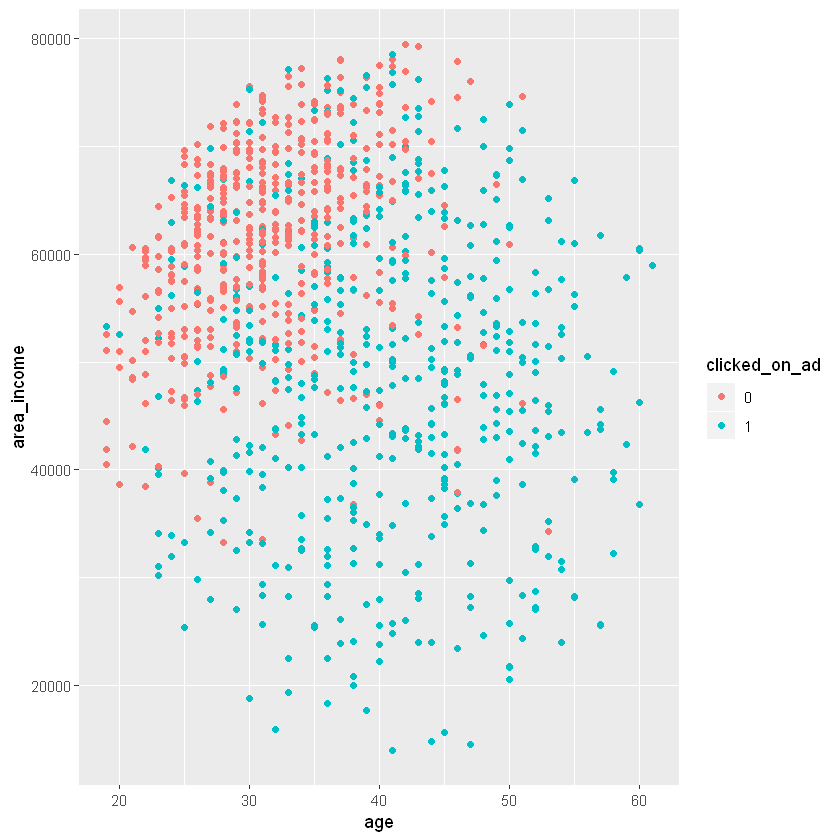

In [19]:
ggplot(data = df, aes(x = age, y = area_income, col = clicked_on_ad)) + 
    geom_point()

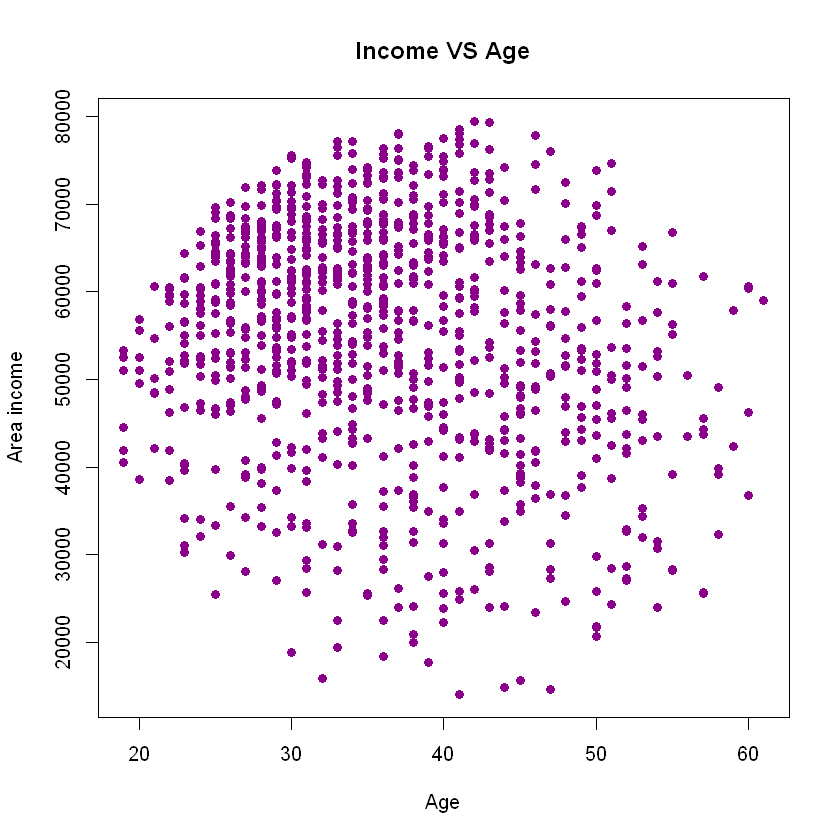

In [28]:
plot(df$age, df$area_income, 
     pch = 19, col = 'darkmagenta',
     ylab = 'Area income', xlab = 'Age',
    main = 'Income VS Age')

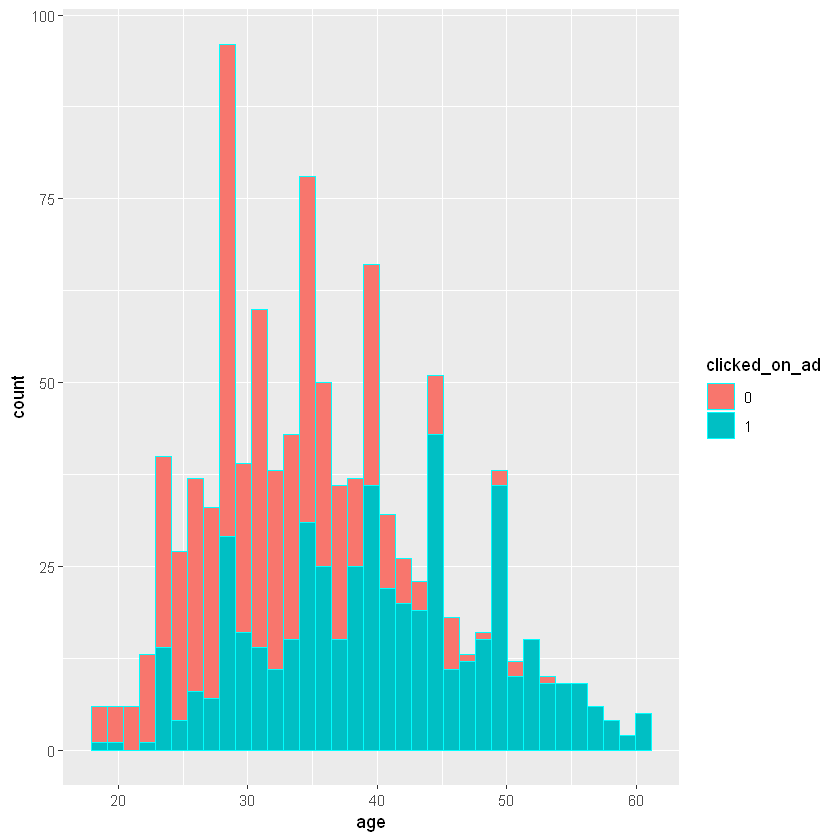

In [21]:
ggplot(data = df, aes(x = age, fill = clicked_on_ad))+
    geom_histogram(bins = 35, color = 'cyan')

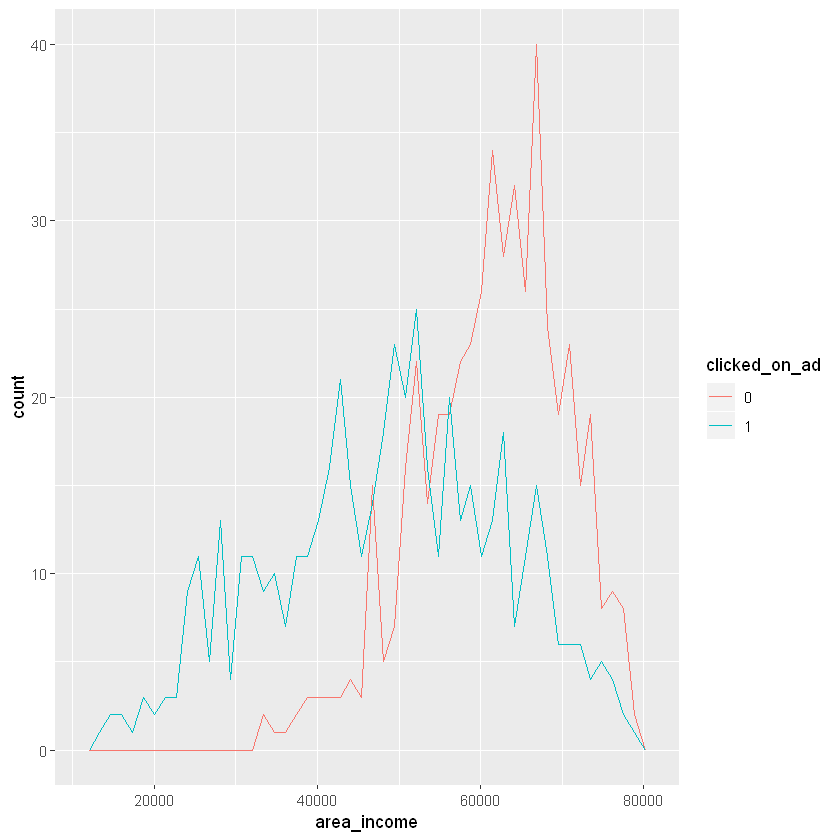

In [26]:
# Frequency polygon
ggplot(data = df, aes(x = area_income, col = clicked_on_ad))+
    geom_freqpoly(bins = 50)